Same thing as `lstm.ipynb` except the classes are better balanced out. 



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
import pickle

# load in labels and samples for the training subset
training_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/nine_seconds/train_samples.pkl', 'rb')
training_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/nine_seconds/train_labels.pkl', 'rb')

# load in labels and samples for the test subset
test_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/nine_seconds/test_samples.pkl', 'rb')
test_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/nine_seconds/test_labels.pkl', 'rb')

In [80]:
# training
X = pickle.load(training_samples_file)
y = pickle.load(training_labels_file)

# test
test_samples = pickle.load(test_samples_file)
test_labels = pickle.load(test_labels_file)

In [81]:
len(X)

2939

In [82]:
counter = 0
for elem in y:
  if elem == 1:
    counter += 1

In [83]:
counter

140

In [84]:
new_x = X[:280]

In [85]:
len(new_x)

280

In [86]:
new_y = y[:280]

In [87]:
len(new_y)

280

Let us also balance out the test set 

In [76]:
counter = 0
for elem in test_labels:
  if elem == 1:
    counter += 1

In [77]:
counter

16

In [78]:
test_labels = test_labels[0:32]
test_samples = test_samples[0:32]

### LSTM 

In [88]:
import tensorflow as tf
import keras

model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(128, 431), return_sequences=True))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(2, activation='softmax'))

In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 64)           126976    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 130       
Total params: 164,290
Trainable params: 164,290
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [91]:
history = model.fit(new_x, new_y, epochs=100)

Epoch 1/100
9/9 [==============================] - 3s 21ms/step - loss: 0.6916 - accuracy: 0.5857
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.5608 - accuracy: 0.9469
Epoch 3/100
9/9 [==============================] - 0s 17ms/step - loss: 0.1818 - accuracy: 0.9755
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1596 - accuracy: 0.9580
Epoch 5/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.9951
Epoch 6/100
9/9 [==============================] - 0s 14ms/step - loss: 0.1002 - accuracy: 0.9852
Epoch 7/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0481 - accuracy: 0.9933
Epoch 8/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0811 - accuracy: 0.9851
Epoch 9/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0605 - accuracy: 0.9907
Epoch 10/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0583 - accuracy: 0.9913
Epoch 11/100
9/9 [=

In [92]:
history_dict = history.history
print(history_dict.keys())
# to keep for later 
%store history_dict

dict_keys(['loss', 'accuracy'])
Stored 'history_dict' (dict)


In [93]:
# imports 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [94]:
# function to plot training given history dictionary 
def plot_training(history_dict):
	"""
	Plots the training accuracy and loss graphs for a Keras model (validation graphs not included). 
	Parameters:
		- history_dict: a dictionary of "history" object from Keras 
	"""
	# plot training accuracy graph 
	plt.plot(history_dict['accuracy'])
	plt.title('Training Accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

	# plot training loss graph 
	plt.plot(history_dict['loss'])
	plt.title('Training Loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

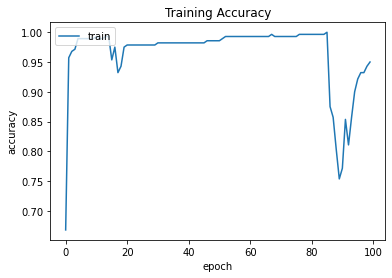

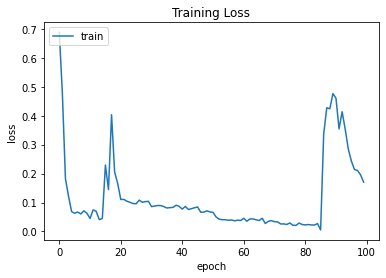

In [95]:
plot_training(history_dict)

In [96]:
test_loss, test_accuracy = model.evaluate(test_samples,  test_labels, verbose=2)
print('Test accuracy:', test_accuracy)

11/11 - 1s - loss: 0.9928 - accuracy: 0.9205
Test accuracy: 0.9204893112182617


In [97]:
predictions = model.predict_classes(test_samples) # generates a list of predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [98]:
print("Test labels: \n", test_labels)
print("Test predictions: \n", predictions)

Test labels: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Test predictions: 
 [1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 

In [99]:
correct = 0
for i in range(len(predictions)):
  if predictions[i] == test_labels[i]:
    correct += 1

In [100]:
predictions_accuracy = correct/len(test_labels)
predictions_accuracy

0.9204892966360856

In [101]:
print("The accuracy is: " + str(round(predictions_accuracy * 100, 1)) + "%")

The accuracy is: 92.0%


In [102]:
speech_correct = 0
for i in range(len(test_labels[:16])):
    if predictions[i] == test_labels[i]:
      speech_correct += 1

In [103]:
speech_correct/len(test_labels[:16])

0.75

100%?! 

In [104]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

In [105]:
cm = confusion_matrix(test_labels, predictions)

In [106]:
def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astypea('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  print(cm)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix without normalization
[[289  22]
 [  4  12]]


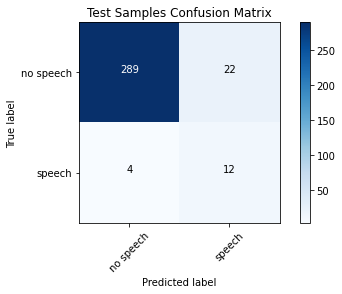

In [107]:
plot_cm(cm, ['no speech','speech'], title='Test Samples Confusion Matrix')